In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import imageio
from skimage.transform import rescale, resize, downscale_local_mean
from scipy.ndimage import binary_erosion, binary_opening
import pandas as pd
import sys
import skimage
sys.path.append("../../")
from VoltageIntensityClass import VoltageIntensity
%matplotlib inline
from scipy import ndimage as ndi
from skimage.feature import peak_local_max
from alienlab.regression_func import residuals, exp_decay, regression_affine, regression_linear, get_affine_func, get_polyfit_func
from alienlab.plot import PlotFigure

import scipy 
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

p = PlotFigure()
p.extension = ".pdf"

p.fonttick = 15
p.fontsize=17
p.figsize=(10,10)
plt.rc('legend', fontsize=15)
p.save_folder = "G:/DREAM/from_github/thesis/Intensity_paper/"
p.date=False



from scipy.fftpack import fft2
from scipy.fftpack import ifft2

from numpy.fft import fftshift, ifftshift

from scipy.fftpack import fft2 as fft
from numpy.fft import fftshift, ifftshift



import alienlab.utils

DDAO 

In [3]:

def dict_to_func(dict_amplitude):
    x = []
    y = []
    for k in dict_amplitude.keys():
        x.append(k)
        y.append(dict_amplitude[k])
    x = np.array(x)
    y = np.array(y)
    func = get_affine_func(x, y)
    return func
    
def amp_to_eins(dict_amplitude, amplitude, lbd):
    #ref: https://fr.wikipedia.org/wiki/Einstein_(unit%C3%A9_de_mesure)
    func = dict_to_func(dict_amplitude)
    power = func(amplitude)
    eins=power*1e-3*1e3*lbd/120/S
    
    return eins

In [4]:
folder_mother = "./wednesday/"# "./wednesday/"
folder_PURPLE= glob.glob(folder_mother + "/*autofocus_PURPLE")[0]
print(folder_PURPLE)

folder_BLUE = glob.glob(folder_mother + "/*autofocus_BLUE")[0]
#print(folder_BLUE)


folder_WHITE = glob.glob(folder_mother + "/*autofocus_WHITE")[0]
print(folder_WHITE)

folder_DRONPA = glob.glob(folder_mother + "/*_calib_video*")[0]
print(folder_DRONPA)

V = VoltageIntensity(folder = glob.glob(folder_mother + "*_bode_diagram*")[0])


./wednesday\2022-09-07_19_26_autofocus_PURPLE
./wednesday\2022-09-07_19_33_autofocus_WHITE
./wednesday\2022-09-07_09_51_D2_calib_video


## LED spectrum

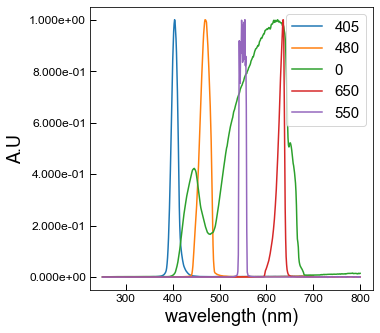

In [5]:
headers, spectrum = alienlab.utils.pandas_to_arrays("spectra/LEDs.csv")
p.xlabel  = "wavelength (nm)"
p.ylabel= "A.U"
fig = p.set_figure("%d")
colors = [405, 480, 0, 650, 550]
funcs = {}
for i in range(len(headers)//2):
    x = spectrum[i*2]
    y = spectrum[i*2+1]/np.max(spectrum[i*2+1])
    plt.plot(x, y, label =  headers[2*i+1])
    funcs[colors[i]] = alienlab.regression_func.get_func(x,y, 5)
plt.legend()

Fitted mean =  403.9903915739245
Fitted standard deviation =  6.6665566251310615


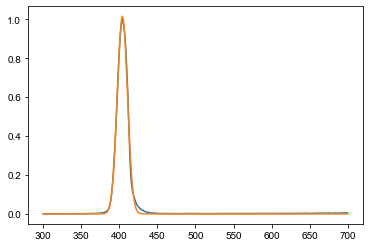

In [6]:
import numpy
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


hist = spectrum[1]/spectrum[1].max()
bin_centres = spectrum[0]

# Define model function to be used to fit to the data above:
def gauss(x, *p):
    A, mu, sigma = p
    return A*numpy.exp(-(x-mu)**2/(2.*sigma**2))

# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
p0 = [1., 400., 1.]

coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)

# Get the fitted curve
hist_fit = gauss(bin_centres, *coeff)

plt.plot(bin_centres, hist, label='Test data')
plt.plot(bin_centres, hist_fit, label='Fitted data')

# Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
print('Fitted mean = ', coeff[1])
print('Fitted standard deviation = ', coeff[2])

plt.show()

## DDAO spectrum

g:\dream\from_github\alienlab\alienlab\utils.py:79: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv(file, skiprows=skiprows, skipfooter=skipfooter)


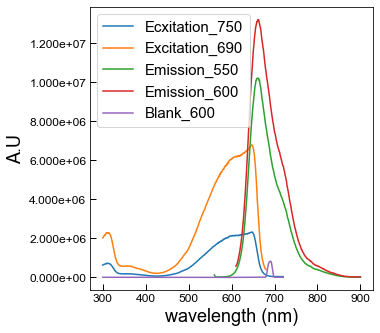

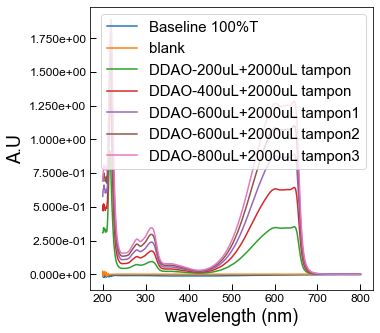

In [7]:
fluo_headers, fluo_spectrum = alienlab.utils.pandas_to_arrays("spectra/fluo_CSV_01_08_2022.csv")
fig = p.set_figure("%d")
for i in range(len(fluo_headers)//2):
    plt.plot(fluo_spectrum[i*2], fluo_spectrum[i*2+1], label =  fluo_headers[2*i+1])
plt.legend()

abs_headers, abs_spectrum = alienlab.utils.pandas_to_arrays("spectra/ddao_01_08_2022.csv", skiprows=[1], skipfooter=280)
fig = p.set_figure("%d")
for i in range(len(abs_headers)//2):
    plt.plot(abs_spectrum[i*2], abs_spectrum[i*2+1], label =  abs_headers[2*i])
plt.legend()

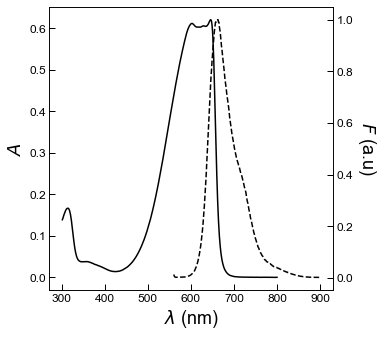

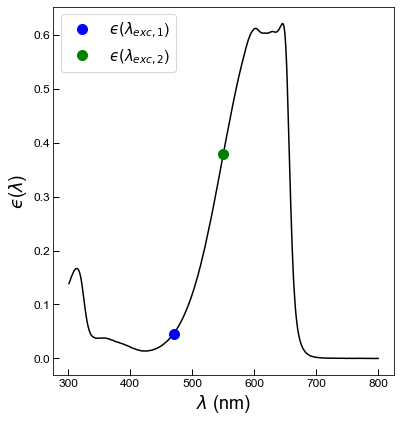

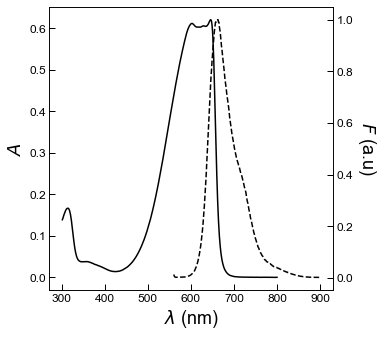

<Figure size 432x288 with 0 Axes>

In [12]:
p.xlabel = r'$\lambda$ (nm)'
p.ylabel = r'$ϵ$($\lambda$)'
p.fontsize *=1.3
p.fonttick *=1.3

fig = p.set_figure(formatx = "%d", formaty = "%0.1f", figsize=(15,15))

x = abs_spectrum[10]
y = abs_spectrum[11]/abs_spectrum[11].max()
func_ddao = alienlab.regression_func.get_func(x,y, 5)

ind = x>300
x = x[ind]
y=y[ind]

plt.plot(x, y, "k")#, label = 'normalized excitation spectrum')

def gaussian(x, mu, sig):
    return np.exp(-(x - mu)**2 / (2 * sig**2))

plt.plot(470, y[x==470], "ob", markersize=10, label = r"$ϵ(\lambda_{exc, 1}$)")
plt.plot(550, y[x==550], "og", markersize=10,label = r"$ϵ(\lambda_{exc, 2}$)")

plt.legend()
plt.savefig(p.save_folder + "/excitation_DDAO_read_690" + p.extension)

p.xlabel = '$\lambda$ (nm)'
p.ylabel = '$A$'
fig = p.set_figure(formatx = "%d", formaty = "%0.1f",figsize=(12+3, 12), label_right=True)

ax1 = plt.gca()
absorbance = abs_spectrum[5]-abs_spectrum[3]
wavelength = abs_spectrum[0]
ind = wavelength>300
x0 = wavelength[ind]
y0 = absorbance[ind]
plt.plot(x, y, "k", label = 'absorbance spectrum')

wavelength = fluo_spectrum[4]
fluo = fluo_spectrum[5]


ax2 = ax1.twinx()
ax2.set_ylabel(r'$F$ (a.u)', fontsize = p.fontsize, rotation=270, labelpad = 25)
ax2.tick_params(labelsize = p.fonttick, length = p.fonttick//2, which = 'major', width = p.linewidth//2, direction = "in")

ax2.plot(wavelength, fluo/fluo.max(), "k", linestyle="--", label = 'fluorescence spectrum (excitation 480nm)')

#plt.legend(loc = "upper left")
p.save_name = "absorbance_fluorescence_DDAO_09uM"
p.saving(fig)

In [9]:
c0 = 100*1e-6
c1 = np.array([0,0,0,0, 200, 0, 400, 0, 600, 0, 800, 0, 1000])
c1 = c1/(2000+c1)*c0
c1[10]

vals = {}
for U in [450, 470, 490, 510, 530, 550, 570, 590, 610, 630, 650, 670]:
    vals[U] = []
    for i in [6, 8, 10, 12]:
        #print(abs_headers[i])
        #print(c1[i])
        x = abs_spectrum[i]
        y = abs_spectrum[i+1]/abs_spectrum[i+1].max()
        vals[U].append(y[x==U]/c1[i]*1e-4)
    vals[U] = (np.mean(vals[U]), np.std(vals[U]))
    
for U in vals.keys():
    print(U, "& %0.2f $\pm$ %0.2f \\\ "%(vals[U]))


450 & 0.09 $\pm$ 0.01 \\ 
470 & 0.18 $\pm$ 0.02 \\ 
490 & 0.34 $\pm$ 0.04 \\ 
510 & 0.60 $\pm$ 0.08 \\ 
530 & 0.98 $\pm$ 0.13 \\ 
550 & 1.44 $\pm$ 0.19 \\ 
570 & 1.89 $\pm$ 0.24 \\ 
590 & 2.24 $\pm$ 0.29 \\ 
610 & 2.31 $\pm$ 0.30 \\ 
630 & 2.31 $\pm$ 0.30 \\ 
650 & 2.27 $\pm$ 0.30 \\ 
670 & 0.21 $\pm$ 0.03 \\ 


## DEFINE LEDs

In [21]:
x = np.linspace(300, 700, 700-300+1)
y_LED = funcs[480](x)
y_PURPLE = funcs[405](x)

y_ddao = func_ddao(x)
y_ddao /= (c1[10]/10)  #mol/m2
y_WHITE = funcs[0](x)

In [22]:
y_ddao[x==470]

array([15979.48567708])

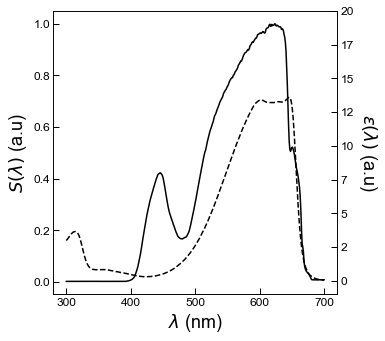

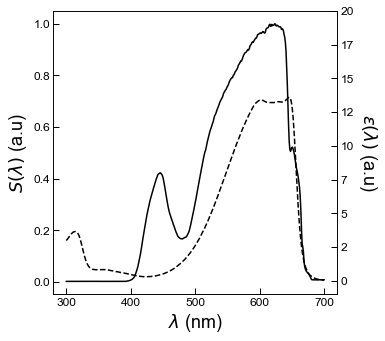

<Figure size 432x288 with 0 Axes>

In [38]:
p.xlabel= r"$\lambda$ (nm)"
fig = p.set_figure("%d", "%0.1f", figsize=(12+3, 12), label_right=True)

ax1= plt.gca()

x = np.linspace(300, 700, 700-300+1)
y_LED = funcs[480](x)

ax1.set_ylabel(r'$S(\lambda)$ (a.u)', fontsize = p.fontsize)
ax1.tick_params(labelsize = p.fonttick, length = p.fonttick//2, which = 'major', width = p.linewidth//2, direction = "in")
ax1.plot(x, y_WHITE/y_WHITE.max(), "-k", label = headers[1])

ax2 = ax1.twinx()


ax2.plot(x, y_ddao/y_ddao[x==470], "--k", label = headers[3])
ax2.set_ylim(-1,20)
ax2.set_ylabel(r'$\epsilon(\lambda)$ (a.u)',  fontsize = p.fontsize, rotation=270, labelpad = 25) 
ax2.tick_params(direction = "in", labelsize = p.fonttick, length = p.fonttick//2, which = 'major', width = p.linewidth//2)
ax2.yaxis.set_major_formatter(FormatStrFormatter('%d'))



p.save_name  = "ddao_white_spectra"
p.saving(fig)

## Dronpa2 calibration

7396.364952900549


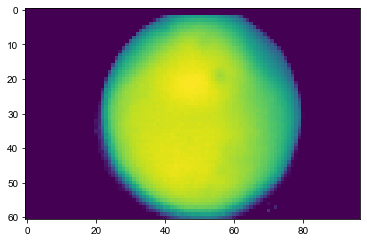

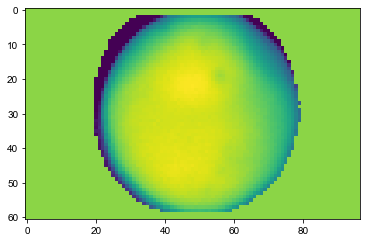

In [26]:
I_480 = np.load(glob.glob(folder_DRONPA + "/*I_480.npy")[0])
plt.imshow(I_480)
plt.figure()
np.median(I_480)
reader = imageio.get_reader(glob.glob(folder_DRONPA + "/video.tiff")[0])
im_read =  reader.get_data(10)
mask_full =im_read>1
mask = downscale_local_mean(mask_full, (10, 10))
mask = mask>0.5
mask = binary_erosion(mask, iterations= 2)
v = I_480*mask
v[v==0]=np.quantile(v, 0.75)
plt.imshow(v)
 
dronpa_480 = np.mean(I_480[mask]) 
print(dronpa_480)

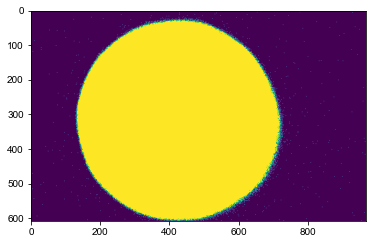

In [27]:
images = np.load(glob.glob(folder_PURPLE + "/*images*")[0])
im_ref = images[-1]
mask = im_ref>1
plt.imshow(mask)

./wednesday\2022-09-07_19_26_autofocus_PURPLE
./wednesday\2022-09-07_19_30_autofocus_BLUE
[0.09063547]
./wednesday\2022-09-07_19_33_autofocus_WHITE


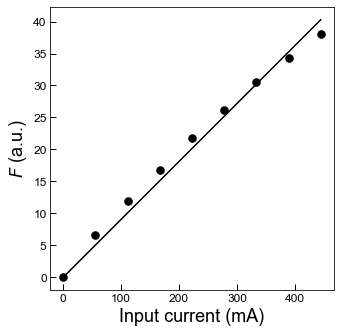

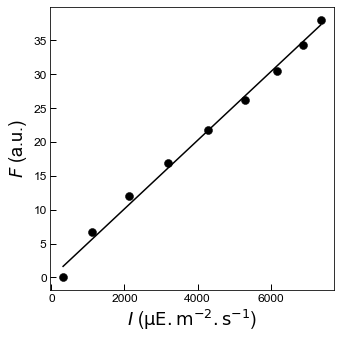

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [28]:
folder_list = [folder_PURPLE,
               folder_BLUE, 
               folder_WHITE
              ]

a_list = {}
wl =[405, 470, 0]

x_volt = np.linspace(0, 500, 10)[:-1]

p.xlabel ="Input current (mA)"
p.ylabel = "$F$ (a.u.)"

fig1 = p.set_figure("%d", "%d")
ax1 = plt.gca()
p.xlabel =p.label_intensity
fig2 = p.set_figure("%d", "%d")
ax2 = plt.gca()
for j,folder in enumerate(folder_list):
    print(folder)
    y = [] 
    images = np.load(glob.glob(folder + "/*images*")[0])
    p.xlabel = "LED current (mA)"
    p.ylabel = "F (a.u.)"
    for i, im in enumerate(images[:-1]):
            m = np.mean(im[mask])
            intensity_blue = V.get_intensity_voltage('blue', 0, x_volt[i]/100)*1e6
            y.append(m)
    y = np.array(y)
    yreg, a, results =  regression_linear(x_volt,y)
    eins =  V.get_intensity_voltage('blue', 0, x_volt/100)

    yreg_eins, a_eins, results =  regression_linear(eins,y)
    a_list[wl[j]] = a

    if wl[j]==470:
        ax1.plot(x_volt, y, ["^", "o", "s"][j], c=["purple", "k", "k"][j], markeredgewidth=0.5, markersize=8)
        ax2.plot(eins*1e6, y, ["^", "o", "s"][j], c=["purple", "k", "k"][j], markeredgewidth=0.5, markersize=8)
        ax1.plot(x_volt, yreg, "k")
        ax2.plot(eins*1e6, yreg_eins, "k")




    
        print(a)
p.save_name = "fluo_fit_DDAO_mA"
u = p.saving(fig1)

p.save_name = "fluo_fit_DDAO_eins_blue"
u = p.saving(fig2)

### spectrum transfer

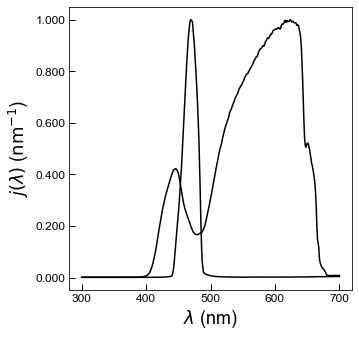

<Figure size 432x288 with 0 Axes>

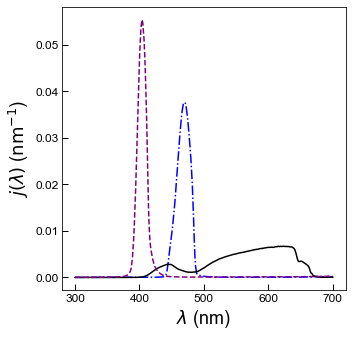

<Figure size 432x288 with 0 Axes>

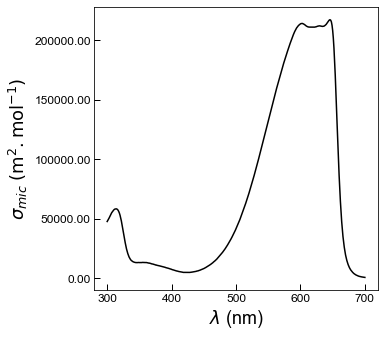

<Figure size 432x288 with 0 Axes>

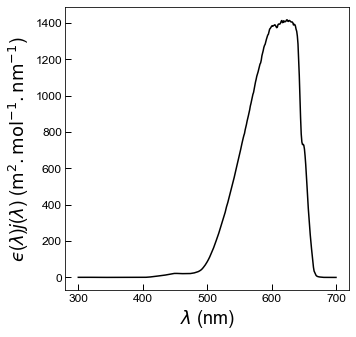

<Figure size 432x288 with 0 Axes>

In [29]:

p.ylabel = r"$j(\lambda)$ ($\mathrm{nm^{-1}}$)"
p.xlabel = r"$\lambda$ (nm)"
fig = p.set_figure("%d", "%0.3f")

plt.plot(x,y_LED, '-k')
plt.plot(x, y_WHITE, '-k')

p.save_name = 'j_2_leds'
p.saving(fig)

fig = p.set_figure("%d", "%0.2f")
y_WHITE = y_WHITE/y_WHITE.sum()
y_LED = y_LED/y_LED.sum()
y_PURPLE /= y_PURPLE.sum() 


plt.plot(x, y_LED, '-.b')
plt.plot(x, y_WHITE, "k")
plt.plot(x, y_PURPLE, '--', c='purple')

p.save_name = 'j_white_led'
p.saving(fig)


p.ylabel= r"$\sigma_{mic}$ $\mathrm{(m^2.mol^{-1})}$"
fig = p.set_figure("%d", "%0.2f")
plt.plot(x, y_ddao, 'k')
p.save_name = 'excitation_spectrum_of_ddao'
p.saving(fig)

p.ylabel= r"$ϵ$($\lambda$)$j$($\lambda$) ($\mathrm{m^2.mol^{-1}.nm^{-1}}$)"
fig = p.set_figure("%d", "%d")
#plt.plot(x, y_LED*y_ddao*1e3, '-.b')
plt.plot(x, y_WHITE*y_ddao, "k")
#plt.plot(x, y_PURPLE*y_ddao*1e3, '--', c='purple')

p.save_name = 'action_spectrum_of_LEDs_ddao_white'
p.saving(fig)

e_470 = np.sum(y_LED*y_ddao)
e_405 = np.sum(y_PURPLE*y_ddao)

e_white = np.sum(y_WHITE*y_ddao)
r_mono_blue = y_ddao[x==470]/np.sum(y_WHITE*y_ddao)

## blue

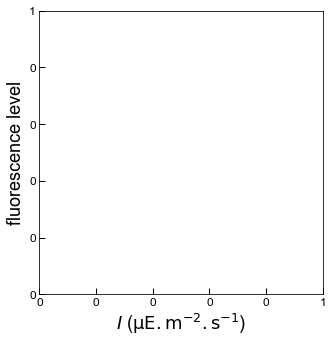

In [30]:
p.xlabel = p.label_intensity
p.ylabel = "fluorescence level"
fig = p.set_figure("%d", "%d")


intensity_blue = V.get_intensity_voltage('blue', 0, x_volt/100)*1e6
#plt.plot(x_volt, intensity_blue, 'ok')
intensity_purple = V.get_intensity_voltage('purple', 0, x_volt/100)*1e6
#plt.plot(intensity_blue, x_volt*a_list[470], "ok")
#plt.plot(intensity_purple, x_volt*a_list[405], "ok")
#plt.plot(intensity_purple, x_volt*a_list[470]*func_ddao(405)/func_ddao(470), "sg")

#plt.plot(x_volt, x_volt*a_list[470], "ok",  c = "none", markeredgecolor="k", markeredgewidth=0.5, markersize=8)
#plt.plot(x_volt, x_volt*a_list[470])

#plt.plot(x_volt, x_volt*a_list[405], "^k", c = "none", markeredgecolor="k", markeredgewidth=0.5, markersize=8)
#plt.plot(x_volt, x_volt*a_list[405])

#plt.plot(x_volt, x_volt*a_list[470]*func_ddao(405)/func_ddao(470), "sk", c = "none", markeredgecolor="k", markeredgewidth=0.5, markersize=8)
#plt.plot(x_volt, x_volt*a_list[470]*func_ddao(405)/func_ddao(470))


## white

[  91.53095962  319.96884544  602.38279923  910.52975901 1219.72112386
 1508.82275398 1760.25497067 1959.9925563  2097.56475436]


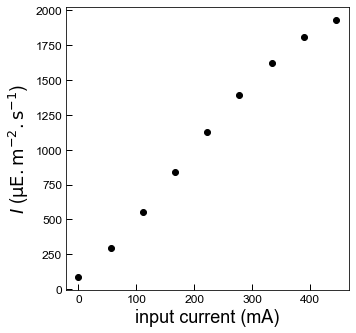

<Figure size 432x288 with 0 Axes>

In [31]:
p.xlabel = "input current (mA)"
p.ylabel = p.label_intensity
fig = p.set_figure("%d", "%d")

FACTOR_BLUE = a_list[0]/a_list[470]*e_470/e_white
FACTOR_PURPLE = a_list[0]/a_list[405]*e_405/e_white
FACTOR_MONO_BLUE = a_list[0]/a_list[470]*r_mono_blue

#plt.plot(x_volt, intensity_blue*FACTOR_BLUE, 'ob')
plt.plot(x_volt, intensity_blue*FACTOR_MONO_BLUE, 'ok')

#plt.plot(x_volt, intensity_purple*FACTOR_PURPLE, 's', color = "purple")


print(intensity_blue*FACTOR_BLUE)
p.save_name = "white_light_DDAO_intensity"
u = p.saving(fig)

1390.8584137936707


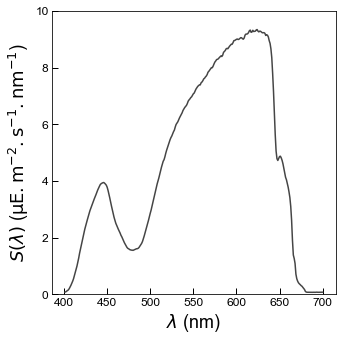

<Figure size 432x288 with 0 Axes>

In [37]:
p.xlabel = r"$\lambda$ (nm)"
p.ylabel = '$S(\lambda)$ ($\mathrm{\mu E.m^{-2}.s^{-1}.nm^{-1}}$)'
fig = p.set_figure("%d", "%d")

colors = plt.cm.binary(np.linspace(0,1,12))

for i in range(1,9):
    if int(x_volt[i]) == 277:
       # val = 0.5*(intensity_blue[i]*FACTOR_BLUE +  intensity_purple[i]*FACTOR_PURPLE)
        val = (intensity_blue[i]*FACTOR_BLUE)
        val = (intensity_purple[i]*FACTOR_PURPLE)
        val = (intensity_blue[i]*FACTOR_MONO_BLUE)
        ind = x>400
        plt.plot(x[ind], y_WHITE[ind]*val , color = colors[i+3])
        plt.ylim(0, 10)
        print(np.sum(y_WHITE*val))

p.save_name = "white_light_DDAO_spectra_blue_MT"
u = p.saving(fig)

294.9527104196565
555.2866845535679
839.3417801942394
1124.3596261549374
1390.8584137936707
1622.63289701319
1806.7543922609898
1933.5707785293037


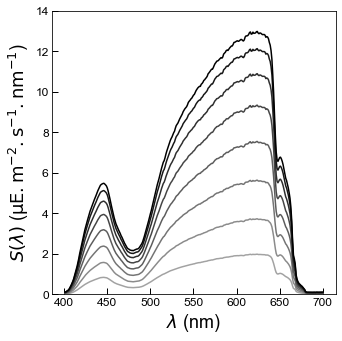

<Figure size 432x288 with 0 Axes>

In [36]:
p.xlabel = r"$\lambda$ (nm)"
p.ylabel = '$S(\lambda)$ ($\mathrm{\mu E.m^{-2}.s^{-1}.nm^{-1}}$)'
fig = p.set_figure("%d", "%d")

colors = plt.cm.binary(np.linspace(0,1,12))

for i in range(1,9):
    #if int(x_volt[i]) == 277:
       # val = 0.5*(intensity_blue[i]*FACTOR_BLUE +  intensity_purple[i]*FACTOR_PURPLE)
        val = (intensity_blue[i]*FACTOR_BLUE)
        val = (intensity_purple[i]*FACTOR_PURPLE)
        val = (intensity_blue[i]*FACTOR_MONO_BLUE)
        ind = x>400
        plt.plot(x[ind], y_WHITE[ind]*val , color = colors[i+3])
        plt.ylim(0, 14)
        print(np.sum(y_WHITE*val))

p.save_name = "white_light_DDAO_spectra_blue"
u = p.saving(fig)

In [26]:
p.save_folder

'G:/DREAM/from_github/thesis/Intensity_paper/'